# rascunho

In [95]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt
import numpy as np

In [96]:
df = pd.read_csv("D:\\OneDrive\\Faculdade\\MBA\\TCC\\Datasets\\archive (1)\\Turbine_Data.csv")
df = df.rename(columns={'Unnamed: 0':'datahora'})
df['datahora'] = pd.to_datetime(df['datahora'], format='%Y-%m-%d %H:%M:%S').dt.tz_localize(None)
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [97]:
df_wind = df[['datahora','WindSpeed']]
df_wind.head()
#df_wind.dtypes

,datahora,WindSpeed
0,2017-12-31 00:00:00,NaN
1,2017-12-31 00:10:00,NaN
2,2017-12-31 00:20:00,NaN
3,2017-12-31 00:30:00,NaN
4,2017-12-31 00:40:00,NaN


<AxesSubplot:xlabel='datahora'>

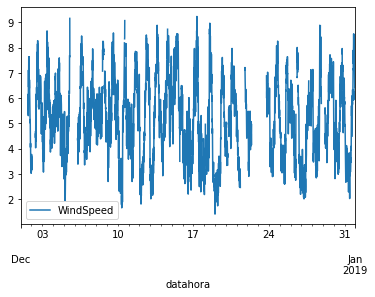

In [98]:
start_dt = dt.datetime(2018,12,1)
end_dt = dt.datetime(2019,1,1)
df_wind_query = df_wind.query('@start_dt <= datahora <= @end_dt')
df_wind_query = df_wind_query.set_index('datahora')
df_wind_query.plot()

<AxesSubplot:xlabel='datahora'>

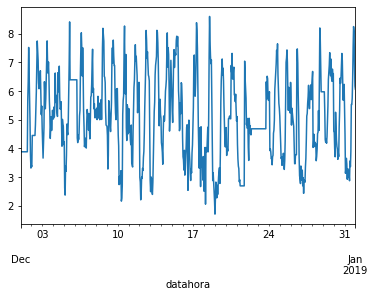

In [99]:
df_serie_temporal = df_wind_query.resample('H').mean().ffill().bfill()
df_serie_temporal['WindSpeed'].plot()

In [100]:
df_serie_temporal.describe()

,WindSpeed
count,745.000000
mean,5.105662
std,1.438150
min,1.700354
25%,3.976288
50%,5.043898
75%,6.252227
max,8.596249


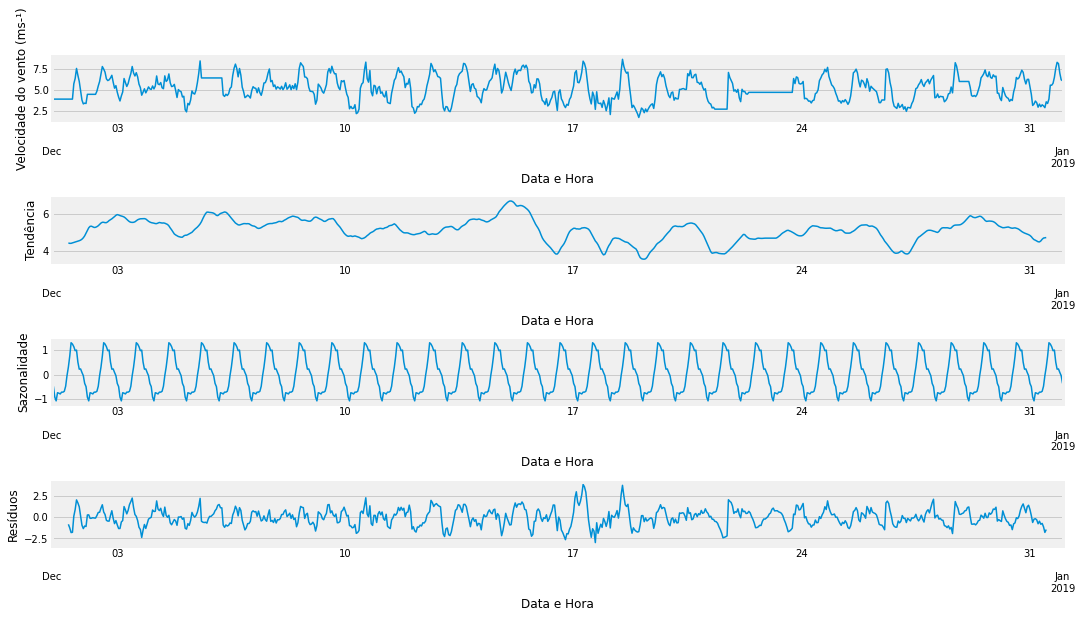

In [328]:
result = seasonal_decompose(x=df_serie_temporal['WindSpeed'].dropna(), model='additive')
#result.plot()
#Plotar em tamanho maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
#result.plot()
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
ax1.set_ylabel('Velocidade do vento (ms-¹)')
ax2.set_ylabel('Tendência')
ax3.set_ylabel('Sazonalidade')
ax4.set_ylabel('Resíduos')
ax1.set_xlabel('Data e Hora')
ax2.set_xlabel('Data e Hora')
ax3.set_xlabel('Data e Hora')
ax4.set_xlabel('Data e Hora')
plt.tight_layout()

{'period1': 24.032258064516128, 'freq1': 0.04161073825503356, 'power1': 372.72441417355327, 'period2': 12.016129032258064, 'freq2': 0.08322147651006712, 'power2': 15.11475621951431, 'period3': 8.010752688172044, 'freq3': 0.12483221476510066, 'power3': 11.599642797204803, 'period4': 3.4331797235023043, 'freq4': 0.2912751677852349, 'power4': 2.2526191976813332, 'period5': 4.806451612903226, 'freq5': 0.20805369127516776, 'power5': 0.850072226818152, 'period6': 6.008064516129032, 'freq6': 0.16644295302013423, 'power6': 0.8406466502692216, 'period7': 23.28125, 'freq7': 0.042953020134228186, 'power7': 0.7285651314513214}


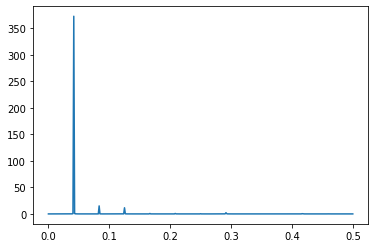

In [126]:
# seasonality with sarima model
from scipy import signal
def my_periodogram(v):
    f, Pxx = signal.periodogram(v.dropna())
    plt.plot(f, Pxx)
    top_3_periods = {}

    # get indices for 3 highest Pxx values
    top3_freq_indices = np.flip(np.argsort(Pxx), 0)[0:7]

    # use indices from previous step to
    # get 3 frequencies with highest power
    freqs = f[top3_freq_indices]

    # use same indices to get powers as well
    power = Pxx[top3_freq_indices]

    # we are interested in period and it is calculated as 1/frequency 
    periods = 1 / np.array(freqs)

    # populate dict with calculated values
    top_3_periods['period1'] = periods[0]
    top_3_periods['freq1'] = freqs[0]
    top_3_periods['power1'] = power[0]

    top_3_periods['period2'] = periods[1]
    top_3_periods['freq2'] = freqs[1]
    top_3_periods['power2'] = power[1]

    top_3_periods['period3'] = periods[2]
    top_3_periods['freq3'] = freqs[2]
    top_3_periods['power3'] = power[2]

    top_3_periods['period4'] = periods[3]
    top_3_periods['freq4'] = freqs[3]
    top_3_periods['power4'] = power[3]

    top_3_periods['period5'] = periods[4]
    top_3_periods['freq5'] = freqs[4]
    top_3_periods['power5'] = power[4]

    top_3_periods['period6'] = periods[5]
    top_3_periods['freq6'] = freqs[5]
    top_3_periods['power6'] = power[5]

    top_3_periods['period7'] = periods[6]
    top_3_periods['freq7'] = freqs[6]
    top_3_periods['power7'] = power[6]

    print(top_3_periods)

my_periodogram(result.seasonal)

In [104]:
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm

adf_test = pm.arima.ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(df_serie_temporal.dropna())
print(p_val)
print(should_diff)
kpss_test = pm.arima.KPSSTest(alpha=0.05)
p_val, should_diff = kpss_test.should_diff(df_serie_temporal.dropna())
print(p_val)
print(should_diff)
pp_test = pm.arima.PPTest(alpha=0.05)
p_val, should_diff = pp_test.should_diff(df_serie_temporal.dropna())
print(p_val)
print(should_diff)

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(df_serie_temporal.dropna(), test='adf')  # -> 0
print(n_adf)
# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(df_serie_temporal.dropna(), test='kpss')  # -> 0
print(n_kpss)
# Or a PP test:
n_pp = ndiffs(df_serie_temporal.dropna(), test='pp')  # -> 0
print(n_pp)


ns_kpss = nsdiffs(df_serie_temporal, m=2)  # -> 0
print(f'ns_diffs {ns_kpss}')

assert n_adf == n_kpss == n_pp == 0

0.01
False
0.1
False
0.01
False
0
0
0
ns_diffs 0


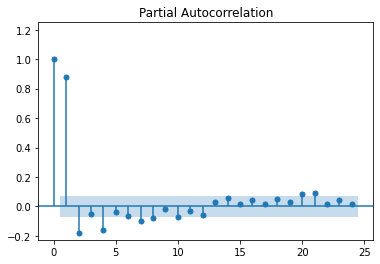

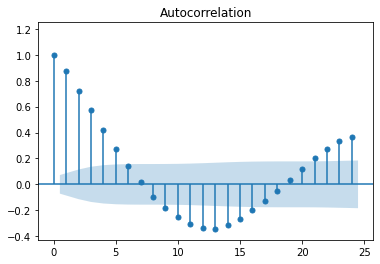

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df_serie_temporal.values, lags=24, auto_ylims=True, alpha=.05)
plot_acf(df_serie_temporal.values, lags=24, auto_ylims=True, alpha=.05)
plt.show()

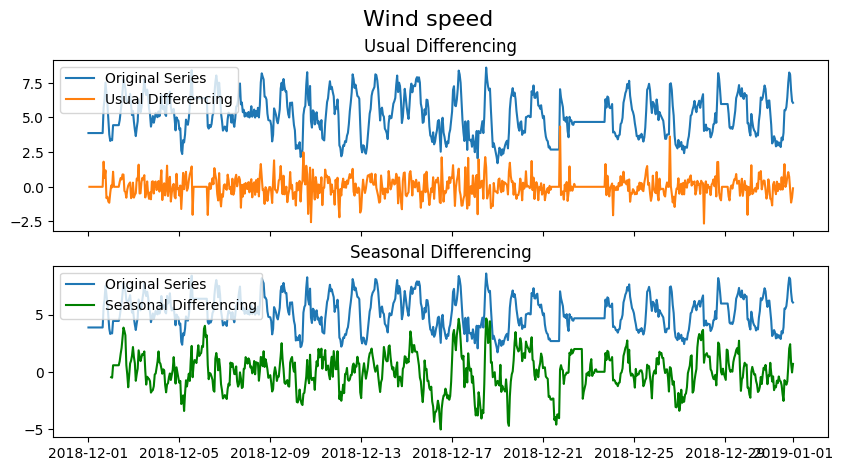

In [109]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_serie_temporal[:], label='Original Series')
axes[0].plot(df_serie_temporal[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Defferencing
axes[1].plot(df_serie_temporal[:], label='Original Series')
axes[1].plot(df_serie_temporal[:].diff(24), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Wind speed', fontsize=16)
plt.show()

In [110]:
model = pm.auto_arima(df_serie_temporal, start_p=1, start_q=1,
                         test='kpss',
                         max_p=5, max_q=5, m=1,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1618.749, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4602.249, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3684.115, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1617.841, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1619.405, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1619.452, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1619.507, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1619.791, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1620.665, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1621.436, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1535.905, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1560.658, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1558.717, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  745
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -762.952
Date:                Tue, 11 Oct 2022   AIC                           1535.905
Time:                        11:13:14   BIC                           1558.972
Sample:                             0   HQIC                          1544.796
                                - 745                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2691      0.054      4.996      0.000       0.164       0.375
ar.L1          1.7590      0.044     40.307      0.000       1.673       1.845
ar.L2         -0.8117      0.036    -22.781      0.000      -0.882      -0.742
ma.L1         -0.7935      0.056    -14.239      0.000      -0.903      -0.684
sigma2         0.4530      0.018     25.725      0.000       0.418       0.487
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               238.32
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.42
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
smodel = pm.auto_arima(df_serie_temporal, start_p=1, start_q=1,
                         test='kpss',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3339.065, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1796.714, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3337.245, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2160.235, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1748.546, Time=2.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.21 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2674.163, Time=1.43 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1738.398, Time=2.86 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1789.904, Time=1.07 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.45 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1739.2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  745
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood                -850.854
Date:                             Tue, 11 Oct 2022   AIC                           1713.709
Time:                                     11:18:23   BIC                           1741.292
Sample:                                          0   HQIC                          1724.349
                                             - 745                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7895      0.036     49.151      0.000       1.718       1.861
ar.L2         -0.8349      0.030    -28.043      0.000      -0.893      -0.777
ma.L1         -0.8474      0.047    -18.160      0.000      -0.939      -0.756
ar.S.L12      -0.7149      0.031    -22.732      0.000      -0.777      -0.653
ar.S.L24      -0.2795      0.029     -9.583      0.000      -0.337      -0.222
sigma2         0.5894      0.026     22.952      0.000       0.539       0.640
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                61.92
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.09
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
n_predict = 24
# Create Training and Test
train = df_serie_temporal[:-n_predict]
test = df_serie_temporal[-n_predict:]

In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
#modelo_sazonal_treino = smodel
modelo_sazonal_treino = ARIMA(train, order=(2, 0, 1), seasonal_order=(2, 1, 0, 24))
modelo_sazonal_treino_fit = modelo_sazonal_treino.fit()
print(modelo_sazonal_treino_fit.summary())
modelo_normal_treino = model

                                     SARIMAX Results                                     
Dep. Variable:                         WindSpeed   No. Observations:                  721
Model:             ARIMA(2, 0, 1)x(2, 1, [], 24)   Log Likelihood                -791.083
Date:                           Tue, 11 Oct 2022   AIC                           1594.166
Time:                                   17:20:39   BIC                           1621.446
Sample:                               12-01-2018   HQIC                          1604.713
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2702      0.161      1.673      0.094      -0.046       0.587
ar.L2          0.4533      0.145      3.130

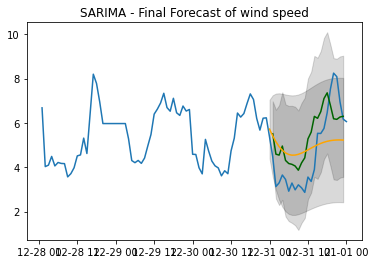

In [149]:
# Forecast
n_periods = 24
#fitted, confint = modelo_sazonal_treino.predict(n_periods=n_periods, return_conf_int=True)
fitted = modelo_sazonal_treino_fit.get_forecast(n_predict, alpha=0.05).predicted_mean
confint = modelo_sazonal_treino_fit.get_forecast(n_predict, alpha=0.05).conf_int(alpha=0.05)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='1H')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(confint.iloc[:, 1], index=index_of_fc)

# Plot
plt.plot(df_serie_temporal[-96:], label='original data')
#plt.plot(test, label='original data')
plt.plot(fitted_series, color='darkgreen', label='forecast sazonal')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)


# normal
fitted2, confint = modelo_normal_treino.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='1H')

# make series for plotting purpose
fitted_series = pd.Series(fitted2, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
plt.plot(fitted_series, color='orange', label='forecast normal')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of wind speed")
plt.show()

In [49]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    from statsmodels.tsa.stattools import acf
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual.T)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf((forecast-actual)[0])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax, 'accuracy': 1-mape})

In [150]:
forecast_accuracy(fitted.values, test.values)

{'mape': 0.4621588846554085,
 'me': 0.6910162000249908,
 'mae': 1.8408301915255874,
 'mpe': 0.2990663139574382,
 'rmse': 2.1600737888352834,
 'acf1': 0.899133726316166,
 'corr': 0.7874814319856196,
 'minmax': 0.22178221266863807,
 'accuracy': 0.5378411153445914}

In [151]:
forecast_accuracy(fitted2, test.values)

{'mape': 0.38785603874741476,
 'me': 0.244569952746939,
 'mae': 1.6278253982283264,
 'mpe': 0.19196619708392493,
 'rmse': 1.7974072034303312,
 'acf1': 0.7910979689964447,
 'corr': 0.5829205420065121,
 'minmax': 0.2658402275785908,
 'accuracy': 0.6121439612525852}

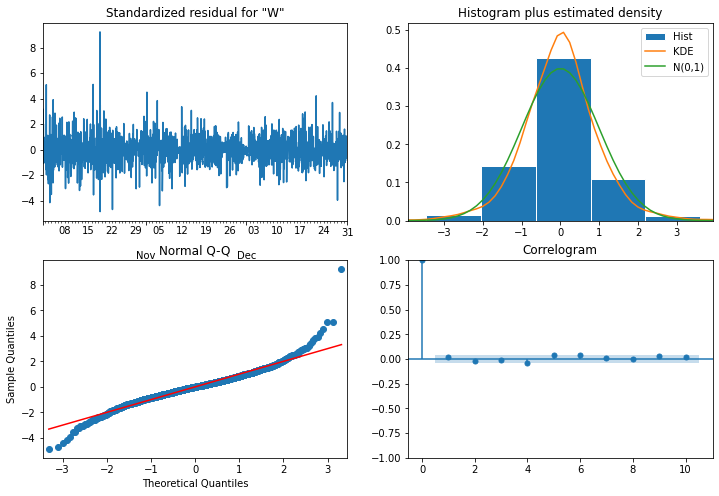

In [63]:
modelo_sazonal_treino_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [329]:
from statsmodels.tsa.arima.model import ARIMA
model_s = ARIMA(train, order=(2,0,1), seasonal_order=(2,1,0,24))
model_s_fit = model_s.fit()
#print(model_s_fit.summary())

model_n = ARIMA(train, order=(2,0,1))
model_n_fit = model_n.fit()
#print(model_n_fit.summary())

model_n2 = ARIMA(train, order=(3,0,5))
model_n2_fit = model_n2.fit()
print(model_n2_fit.summary())

model_n3 = ARIMA(train, order=(2,0,5))
model_n3_fit = model_n3.fit()
print(model_n3_fit.summary())

model_n4 = ARIMA(train, order=(4,0,5))
model_n4_fit = model_n4.fit()
print(model_n4_fit.summary())

model_n5 = ARIMA(train, order=(5,0,5))
model_n5_fit = model_n5.fit()
print(model_n5_fit.summary())

D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              WindSpeed   No. Observations:                  721
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -725.365
Date:                Sat, 15 Oct 2022   AIC                           1470.731
Time:                        15:17:47   BIC                           1516.537
Sample:                    12-01-2018   HQIC                          1488.413
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0974      0.122     41.843      0.000       4.859       5.336
ar.L1          2.6077      0.073     35.814      0.000       2.465       2.750
ar.L2         -2.3091      0.139    -16.663      0.0

D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              WindSpeed   No. Observations:                  721
Model:                 ARIMA(4, 0, 5)   Log Likelihood                -729.066
Date:                Sat, 15 Oct 2022   AIC                           1480.131
Time:                        15:17:51   BIC                           1530.518
Sample:                    12-01-2018   HQIC                          1499.582
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1087      0.124     41.097      0.000       4.865       5.352
ar.L1          2.0337      0.361      5.633      0.000       1.326       2.741
ar.L2         -0.7284      0.974     -0.748      0.4

D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              WindSpeed   No. Observations:                  721
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -726.909
Date:                Sat, 15 Oct 2022   AIC                           1477.818
Time:                        15:17:54   BIC                           1532.786
Sample:                    12-01-2018   HQIC                          1499.038
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1103      0.130     39.415      0.000       4.856       5.364
ar.L1          1.5917      0.081     19.566      0.000       1.432       1.751
ar.L2         -0.4551      0.164     -2.768      0.0

In [333]:
def avail_model(model_fitss, test):
    fittedss = model_fitss.get_forecast(n_predict, alpha=0.05).predicted_mean
    print(forecast_accuracy(fittedss.values, test.values))
avail_model(model_n2_fit, test)
avail_model(model_n3_fit, test)
avail_model(model_n4_fit, test)
avail_model(model_n5_fit, test)

{'mape': 0.40452088178048384, 'me': 0.3440176590872173, 'mae': 1.673768982338556, 'mpe': 0.21582318106975554, 'rmse': 1.9213298449514211, 'acf1': 0.9654286571245144, 'corr': 0.8703789202695748, 'minmax': 0.20672187436291178, 'accuracy': 0.5954791182195162}
{'mape': 0.3879372424069472, 'me': 0.24376196130348887, 'mae': 1.6281970262282335, 'mpe': 0.19177236416774768, 'rmse': 1.8248022190349076, 'acf1': 0.9550814586326757, 'corr': 0.8717229382885759, 'minmax': 0.23109334035316775, 'accuracy': 0.6120627575930528}
{'mape': 0.39925760913138464, 'me': 0.32968410244754565, 'mae': 1.6518926568126953, 'mpe': 0.21238463589061812, 'rmse': 1.8663302232180963, 'acf1': 0.9648680765878676, 'corr': 0.8590532359171662, 'minmax': 0.22124066037813106, 'accuracy': 0.6007423908686154}
{'mape': 0.4094568740690389, 'me': 0.36998097417545317, 'mae': 1.6892454083910806, 'mpe': 0.22205164440062117, 'rmse': 1.9521853856936762, 'acf1': 0.9666562703467383, 'corr': 0.8577977044470045, 'minmax': 0.20399469580918794, 

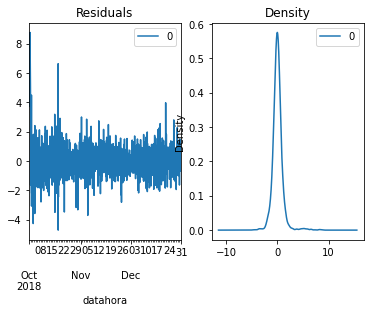

In [55]:
# Plot residual errors
residuals = pd.DataFrame(model_s_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

,lb_stat,lb_pvalue
1,0.501222,0.478963
2,3.589628,0.166158
3,3.637479,0.303364
4,4.331580,0.362987
5,7.276770,0.200857
6,9.052500,0.170647
7,9.123597,0.243904
8,9.197133,0.325940
9,10.239914,0.331414
10,10.367771,0.408841


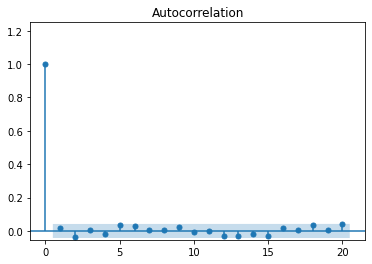

In [87]:
import statsmodels.api as sm
plot_acf(residuals, lags=20, auto_ylims=True, alpha=.05)

sm.stats.acorr_ljungbox(residuals.rename(columns={0:'res'})['res'], lags=None)
# se p_value > 0.05 não há correlação entre os pontos (portmanteau test) indicando white noise

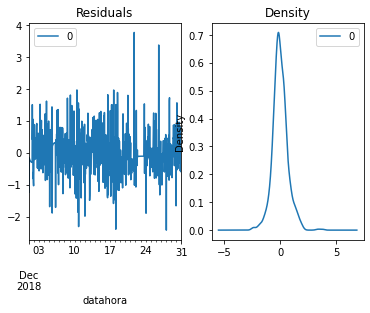

In [114]:
# Plot residual errors
residuals = pd.DataFrame(model_n_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

,lb_stat,lb_pvalue
1,0.213846,0.643769
2,3.814510,0.148487
3,6.392018,0.094020
4,7.012768,0.135215
5,7.254135,0.202416
6,9.058083,0.170338
7,10.119968,0.181876
8,10.566933,0.227465
9,11.634552,0.234704
10,11.787923,0.299501


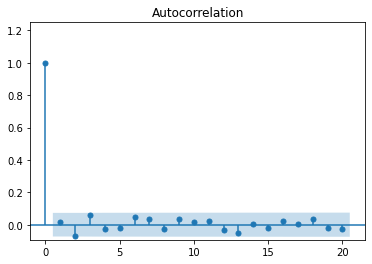

In [115]:
plot_acf(residuals, lags=20, auto_ylims=True, alpha=.05)

sm.stats.acorr_ljungbox(residuals.rename(columns={0:'res'})['res'], lags=None)
# se p_value > 0.05 não há correlação entre os pontos (portmanteau test) indicando white noise

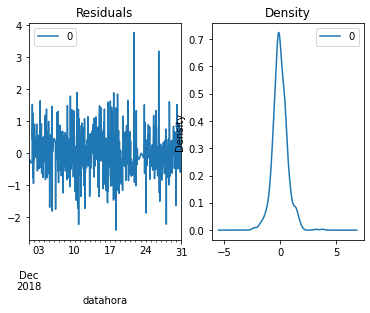

In [123]:
# Plot residual errors
residuals = pd.DataFrame(model_n2_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

,lb_stat,lb_pvalue
1,0.025289,0.873649
2,0.027765,0.986214
3,0.047708,0.997268
4,0.048016,0.999716
5,0.387181,0.995675
6,0.766732,0.992936
7,0.916057,0.996071
8,2.370831,0.967482
9,2.908809,0.967801
10,2.964109,0.982256


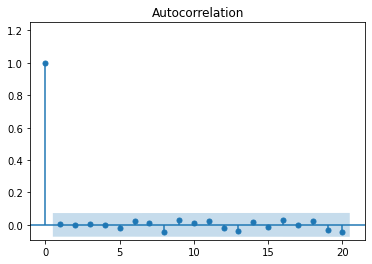

In [124]:
plot_acf(residuals, lags=20, auto_ylims=True, alpha=.05)

sm.stats.acorr_ljungbox(residuals.rename(columns={0:'res'})['res'], lags=None)
# se p_value > 0.05 não há correlação entre os pontos (portmanteau test) indicando white noise

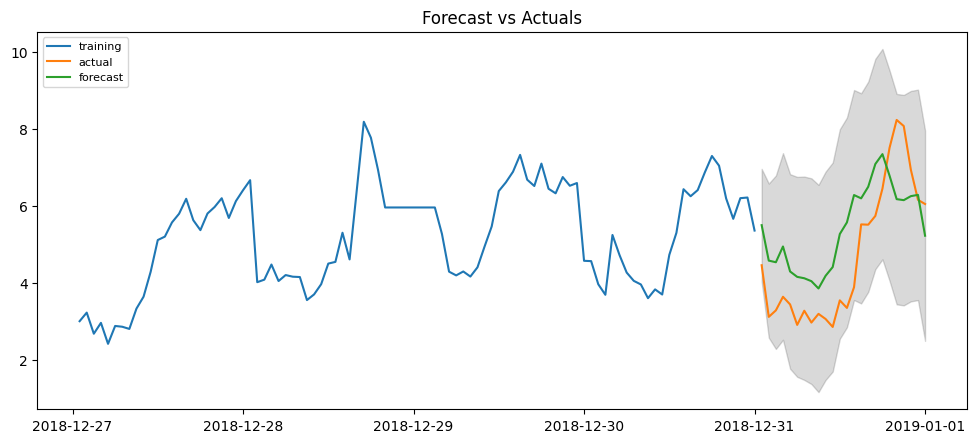

mase 3.62133767951551


{'mape': 0.4621588846554085,
 'me': 0.6910162000249908,
 'mae': 1.8408301915255874,
 'mpe': 0.2990663139574382,
 'rmse': 2.1600737888352834,
 'acf1': 0.899133726316166,
 'corr': 0.7874814319856196,
 'minmax': 0.22178221266863807,
 'accuracy': 0.5378411153445914}

In [186]:
# Build Model   
model_s_fit = model_s.fit()
# Forecast
#fc, se, conf = model_s_fit.get_forecast(n_predict, alpha=0.05)  # 95% conf
fc = model_s_fit.get_forecast(n_predict, alpha=0.05).predicted_mean
conf = model_s_fit.get_forecast(n_predict, alpha=0.05).conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-96:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mase = forecast_accuracy(fc.values, test.values)['mae'] / (np.abs(train.diff(1).dropna().values).sum() / (train.shape[0] - 1))
print(f'mase {mase}')
forecast_accuracy(fc.values, test.values)

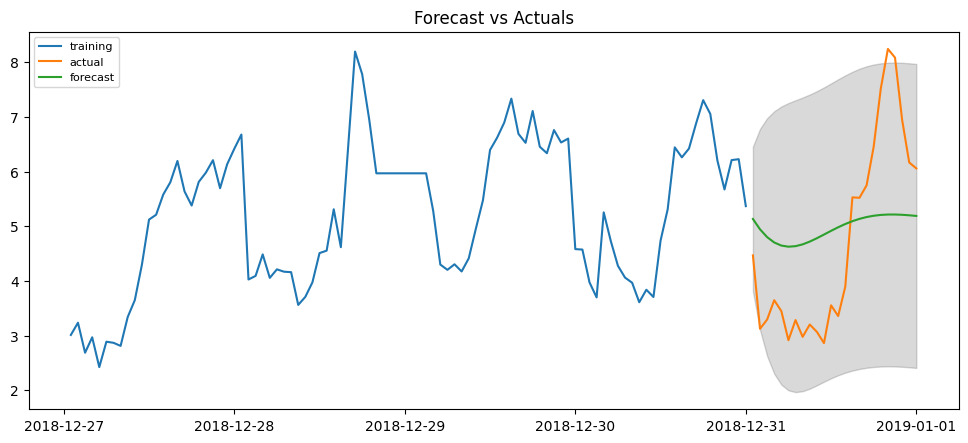

mase 3.199995588118102


{'mape': 0.3877307845480142,
 'me': 0.24564550695709267,
 'mae': 1.6266498771096587,
 'mpe': 0.1922242169067224,
 'rmse': 1.7848787850959684,
 'acf1': 0.923060040432281,
 'corr': 0.8501569176838308,
 'minmax': 0.26084975837026236,
 'accuracy': 0.6122692154519858}

In [184]:
# Build Model   
#model_n_fit = model_n.fit()
# Forecast
#fc, se, conf = model_s_fit.get_forecast(n_predict, alpha=0.05)  # 95% conf
fc = model_n_fit.get_forecast(n_predict, alpha=0.05).predicted_mean
conf = model_n_fit.get_forecast(n_predict, alpha=0.05).conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-96:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mase = forecast_accuracy(fc.values, test.values)['mae'] / (np.abs(train.diff(1).dropna().values).sum() / (train.shape[0] - 1))
print(f'mase {mase}')
forecast_accuracy(fc.values, test.values)

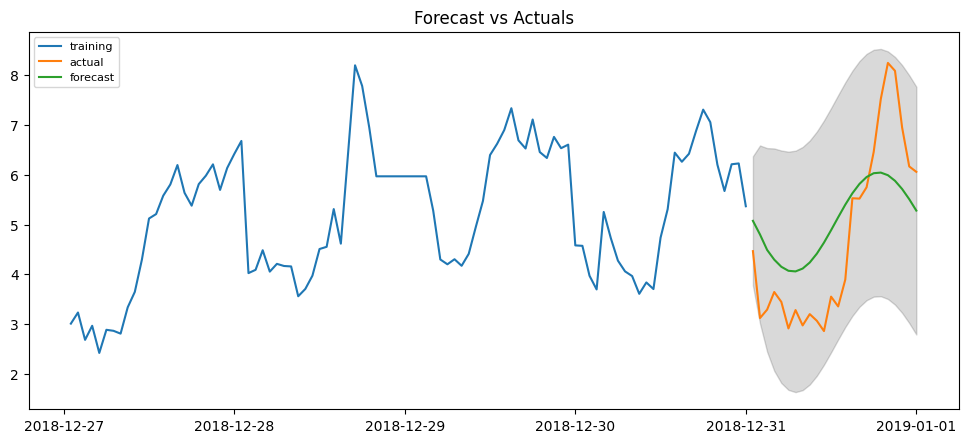

mase 3.2926897388203185


{'mape': 0.40452088178048384,
 'me': 0.3440176590872173,
 'mae': 1.673768982338556,
 'mpe': 0.21582318106975554,
 'rmse': 1.9213298449514211,
 'acf1': 0.9654286571245144,
 'corr': 0.8703789202695748,
 'minmax': 0.20672187436291178,
 'accuracy': 0.5954791182195162}

In [180]:
# Build Model   
#model_n2_fit = model_n2.fit()
# Forecast
#fc, se, conf = model_s_fit.get_forecast(n_predict, alpha=0.05)  # 95% conf
fc = model_n2_fit.get_forecast(n_predict, alpha=0.05).predicted_mean
conf = model_n2_fit.get_forecast(n_predict, alpha=0.05).conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-96:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mase = forecast_accuracy(fc.values, test.values)['mae'] / (np.abs(train.diff(1).dropna().values).sum() / (train.shape[0] - 1))
print(f'mase {mase}')
forecast_accuracy(fc.values, test.values)


# analisando a componente sazonal

In [337]:
# teste de estacionariedade
def stationarity_test(v, diff=None):
    if diff is not None:
        for i in range(diff):
            v = v.diff(1)
    adf_test = pm.arima.ADFTest(alpha=0.05)
    p_val, should_diff = adf_test.should_diff(v.dropna())
    print(p_val)
    print(should_diff)
    kpss_test = pm.arima.KPSSTest(alpha=0.05)
    p_val, should_diff = kpss_test.should_diff(v.dropna())
    print(p_val)
    print(should_diff)
    pp_test = pm.arima.PPTest(alpha=0.05)
    p_val, should_diff = pp_test.should_diff(v.dropna())
    print(p_val)
    print(should_diff)

    # Estimate the number of differences using an ADF test:
    n_adf = ndiffs(v.dropna(), test='adf')  # -> 0
    print(n_adf)
    # Or a KPSS test (auto_arima default):
    n_kpss = ndiffs(v.dropna(), test='kpss')  # -> 0
    print(n_kpss)
    # Or a PP test:
    n_pp = ndiffs(v.dropna(), test='pp')  # -> 0
    print(n_pp)
    print(adf_test)
    from statsmodels.tsa.stattools import kpss, adfuller
    print(kpss(v))
    print(adfuller(v))

    ns_kpss = nsdiffs(v, m=2)  # -> 0
    print(f'ns_diffs {ns_kpss}')

    assert n_adf == n_kpss == n_pp == 0


stationarity_test(result.seasonal)

0.01
False
0.1
False
0.01
False
0
0
0
ADFTest()
(0.017358162393330163, 0.1, 15, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(-44.37406314758863, 0.0, 20, 724, {'1%': -3.4394144152232995, '5%': -2.8655403100177566, '10%': -2.5689002207655443}, -2150.566319992492)
ns_diffs 0


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


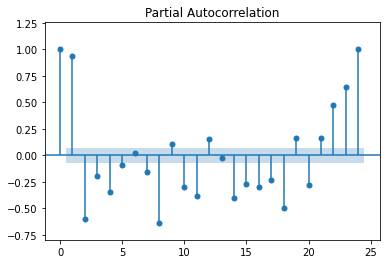

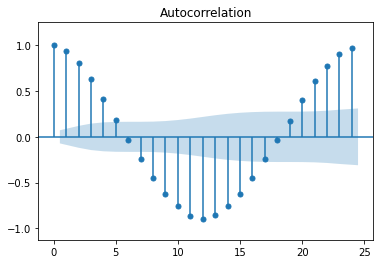

In [188]:
# acf, pacf
plot_pacf(result.seasonal.dropna(), lags=24, auto_ylims=True, alpha=.05)
plot_acf(result.seasonal.dropna(), lags=24, auto_ylims=True, alpha=.05)
plt.show()

In [202]:
model_s2 = ARIMA(train, order=(3,0,5), seasonal_order=(0,0,0,24))
model_s2_fit = model_s2.fit()
print(model_s2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              WindSpeed   No. Observations:                  721
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -725.365
Date:                Thu, 13 Oct 2022   AIC                           1470.731
Time:                        14:58:56   BIC                           1516.537
Sample:                    12-01-2018   HQIC                          1488.413
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0974      0.122     41.843      0.000       4.859       5.336
ar.L1          2.6077      0.073     35.814      0.000       2.465       2.750
ar.L2         -2.3091      0.139    -16.663      0.0

D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


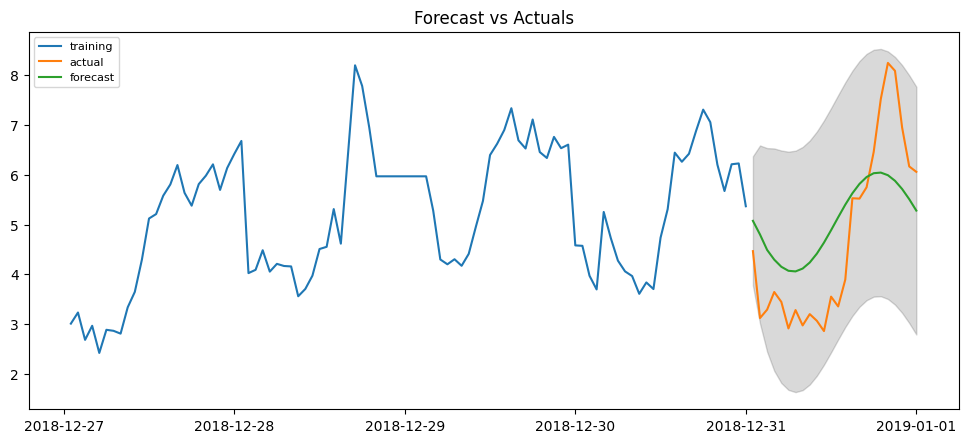

mase 3.2926897388203185


{'mape': 0.40452088178048384,
 'me': 0.3440176590872173,
 'mae': 1.673768982338556,
 'mpe': 0.21582318106975554,
 'rmse': 1.9213298449514211,
 'acf1': 0.9654286571245144,
 'corr': 0.8703789202695748,
 'minmax': 0.20672187436291178,
 'accuracy': 0.5954791182195162}

In [203]:
fc = model_s2_fit.get_forecast(n_predict, alpha=0.05).predicted_mean
conf = model_s2_fit.get_forecast(n_predict, alpha=0.05).conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-96:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mase = forecast_accuracy(fc.values, test.values)['mae'] / (np.abs(train.diff(1).dropna().values).sum() / (train.shape[0] - 1))
print(f'mase {mase}')
forecast_accuracy(fc.values, test.values)

C:\Users\renat\AppData\Local\Temp\ipykernel_18644\3138691688.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  pred1 = ExponentialSmoothing(np.asarray(train['WindSpeed']), trend='additive', damped=False, seasonal='additive',



== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  1.0
Smoothing Slope:  0.0
Smoothing Seasonal:  0.0
Initial Level:  4.2714
Initial Slope:  0.0021
Initial Seasons:  [-0.3985 -0.5003 -0.8858 -1.0443 -0.7255 -0.7411 -0.7575 -0.6971 -0.6889
 -0.6599 -0.448  -0.0047  0.3422  0.7332  1.2821  1.225   1.1161  0.9515
  0.9731  0.482   0.1917  0.1982  0.0511 -0.0803]

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  721
Model:             ExponentialSmoothing   SSE                            324.827
Optimized:                         True   AIC                           -518.887
Trend:                         Additive   BIC                           -390.629
Seasonal:                      Additive   AICC                          -516.191
Seasonal Periods:                    24   Date:                 Tue, 11 Oct 2022
Box-Cox:                          False   Time:    

<AxesSubplot:xlabel='datahora'>

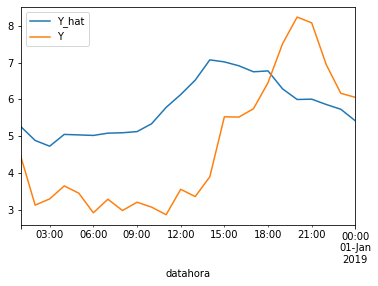

In [182]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['WindSpeed']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 24).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_trend'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_trend'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')
print(pred1.summary())

### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 24)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['WindSpeed']})
print(df_pred1)
df_pred1.plot()

In [183]:
mase = forecast_accuracy(y_pred1, test.values)['mae'] / (np.abs(train.diff(1).dropna().values).sum() / (train.shape[0] - 1))
print(f'mase {mase}')
forecast_accuracy(y_pred1, test.values)

mase 3.7555685007405963


{'mape': 0.5044850903104449,
 'me': 1.0642716990378847,
 'mae': 1.9090635821155173,
 'mpe': 0.38860835359085716,
 'rmse': 2.180448866536163,
 'acf1': 0.9228304706647276,
 'corr': 0.47674356978182264,
 'minmax': 0.2871375951464422,
 'accuracy': 0.49551490968955514}

# redes neurais

In [ ]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'skforecast'

In [ ]:
df.columns

Index(['datahora', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [239]:
df_ml_timeseries = df_serie_temporal.copy()
df_ml_timeseries.head()

,WindSpeed
datahora,
2018-12-01 00:00:00,3.875
2018-12-01 01:00:00,3.875
2018-12-01 02:00:00,3.875
2018-12-01 03:00:00,3.875
2018-12-01 04:00:00,3.875


In [240]:
# predizer a velocidade do vento baseado na velocidade do vento do dia anterior
# periods=3 devido ao modelo arima com p=3
df_ml_timeseries['WindSpeed_d-1'] = df_ml_timeseries['WindSpeed'].shift(periods=3)
df_ml_timeseries = df_ml_timeseries.dropna()
df_ml_timeseries.head()

,WindSpeed,WindSpeed_d-1
datahora,,
2018-12-01 03:00:00,3.875,3.875
2018-12-01 04:00:00,3.875,3.875
2018-12-01 05:00:00,3.875,3.875
2018-12-01 06:00:00,3.875,3.875
2018-12-01 07:00:00,3.875,3.875


<AxesSubplot:xlabel='datahora'>

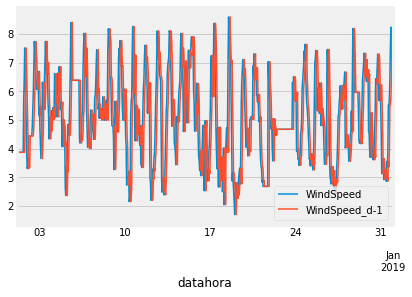

In [241]:
df_ml_timeseries.plot()

In [242]:
n_predict = 24
# Create Training and Test
ml_x_train = df_ml_timeseries['WindSpeed_d-1'][:-n_predict]
ml_y_train = df_ml_timeseries['WindSpeed'][:-n_predict]
ml_x_test = df_ml_timeseries['WindSpeed_d-1'][-n_predict:]
ml_y_test = df_ml_timeseries['WindSpeed'][-n_predict:]


LR: 0.307570 (0.066189)


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawa

NN: 0.317132 (0.064800)
KNN: 0.143144 (0.142566)


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\OneDrive\Trabalho\Ambientes Python\Pytho

RF: -0.056941 (0.182811)
SVR: 0.290409 (0.081121)


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\utils\validation.py:1111: DataConve

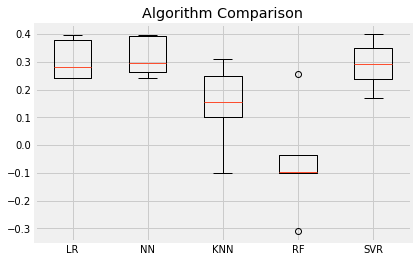

In [256]:
#from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 #tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, ml_x_train.values.reshape(len(ml_x_train), 1), ml_y_train.values.reshape(len(ml_y_train), 1), scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [261]:

regr = MLPRegressor(random_state=1, max_iter=1000, activation='tanh', hidden_layer_sizes=(150,)).fit(ml_x_train.values.reshape(len(ml_x_train), 1), ml_y_train.values.reshape(len(ml_y_train), 1))
regr.predict(ml_x_test.values.reshape(len(ml_x_test), 1))

regr.score(ml_x_test.values.reshape(len(ml_x_test), 1), ml_y_test.values.reshape(len(ml_y_test), 1))


D:\OneDrive\Trabalho\Ambientes Python\Python310\eawar\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4107050481252481

Text(0, 0.5, 'Velocidade do vento (ms-¹)')

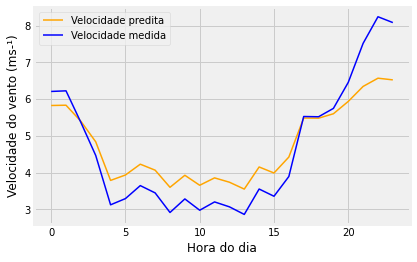

In [334]:
plt.plot(regr.predict(ml_x_test.values.reshape(len(ml_x_test), 1)), color='orange', label='Velocidade predita')
plt.plot(ml_x_test.values.reshape(len(ml_x_test), 1), color='blue', label='Velocidade medida')
plt.legend()
plt.xlabel('Hora do dia')
plt.ylabel('Velocidade do vento (ms-¹)')

In [323]:
# Accuracy metrics
def forecast_accuracy2(forecast, actual):
    from statsmodels.tsa.stattools import acf
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast[:,0], actual[:,0])[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:], 
                              actual[:]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:], 
                              actual[:]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf((forecast[:,0]-actual[:,0]))[0]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax, 'accuracy': 1-mape})

In [325]:
y_pred_ml = regr.predict(ml_x_test.values.reshape(len(ml_x_test), 1))
forecast_accuracy2(y_pred_ml.reshape(len(y_pred_ml),1), ml_x_test.values.reshape(len(ml_x_test),1))

{'mape': 0.14359124186678626,
 'me': 0.11542071795494076,
 'mae': 0.6088606580152077,
 'mpe': 0.0772394780838676,
 'rmse': 0.7257849286744538,
 'acf1': 1.0,
 'corr': 0.9894058748109653,
 'minmax': 0.12548133567609643,
 'accuracy': 0.8564087581332137}

In [338]:
y_pred_ml

array([5.82743478, 5.83516794, 5.39783627, 4.83927404, 3.78919612,
       3.93621931, 4.23023257, 4.06744627, 3.60148641, 3.92854654,
       3.65689476, 3.85803359, 3.7400386 , 3.55276618, 4.15464719,
       3.99091356, 4.4248119 , 5.48624902, 5.48233249, 5.60240412,
       5.93836784, 6.34661286, 6.57028208, 6.52455381])

In [340]:
regr.predict(ml_x_test.values.reshape(len(ml_x_test), 1))

array([5.82743478, 5.83516794, 5.39783627, 4.83927404, 3.78919612,
       3.93621931, 4.23023257, 4.06744627, 3.60148641, 3.92854654,
       3.65689476, 3.85803359, 3.7400386 , 3.55276618, 4.15464719,
       3.99091356, 4.4248119 , 5.48624902, 5.48233249, 5.60240412,
       5.93836784, 6.34661286, 6.57028208, 6.52455381])

In [341]:
regr.predict(ml_x_test.values.reshape(len(ml_x_test), 1))

array([5.82743478, 5.83516794, 5.39783627, 4.83927404, 3.78919612,
       3.93621931, 4.23023257, 4.06744627, 3.60148641, 3.92854654,
       3.65689476, 3.85803359, 3.7400386 , 3.55276618, 4.15464719,
       3.99091356, 4.4248119 , 5.48624902, 5.48233249, 5.60240412,
       5.93836784, 6.34661286, 6.57028208, 6.52455381])